In [14]:
from models.data import training_tempo, training_csv
from models.tempo import windowed_tempo, median_windowed_tempo, overlap_windowed_tempo, evaluate
import librosa
import numpy as np
import matplotlib.pyplot as plt
from numpy import r_

In [37]:
import os
def get_files(directory):
    files = []
    for dirpath, dirnames, filenames in os.walk(directory):
        files.append(filenames)
    return files

# tempo_fn - Function used to estimate tempo on test data
# returns - tuple holding estimated tempo data and associated groundtruth tempos(in form (tempo, length in ms))
def get_data(tempo_fn, win_len=3):
    X_files, y_files = list(os.walk("../dataset/audio"))[0][2], list(os.walk("../dataset/labels"))[0][2]    
    arr = []
    for filename in X_files:
        x, sr = librosa.load("../dataset/audio/" + filename)
        csv = training_tempo("../dataset/labels/" + filename.replace("wav", "csv"))
        
        arr.append((tempo_fn(x, win_len = win_len), csv))
    return arr
    

In [58]:
data = get_data(windowed_tempo, win_len=2)

In [59]:
windowed_errors = []
for pair in data:
    gt, tempos = pair[1], pair[0] 
    error, signal, gt_signal = evaluate(gt, tempos, win_len=2)
    windowed_errors.append((error, signal, gt_signal))

2805.2481651306152


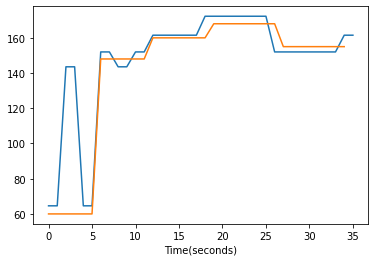

0.01763916015625


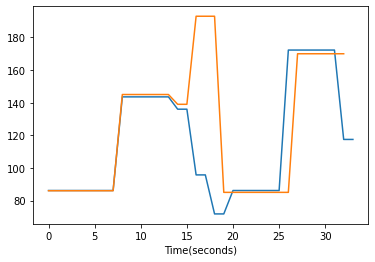

2.46588134765625


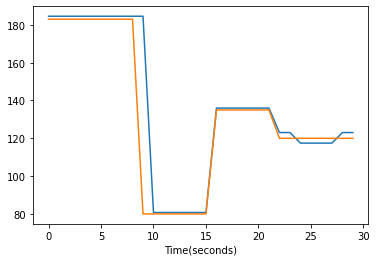

4.8365631103515625


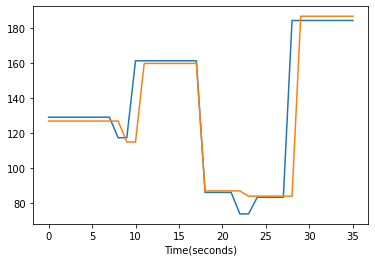

59.25903380886143


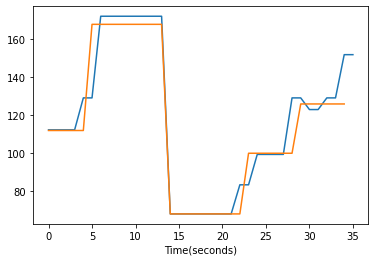

3.5797595108994074


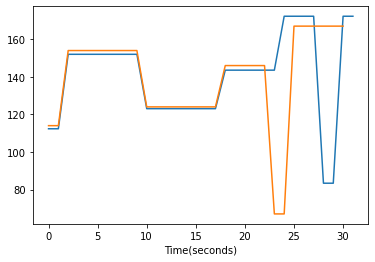

1.8148043367497702


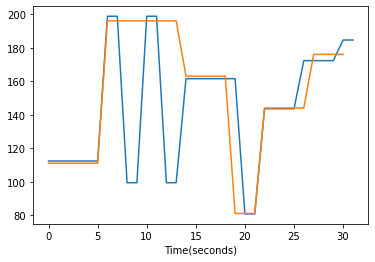

0.6742529751413106


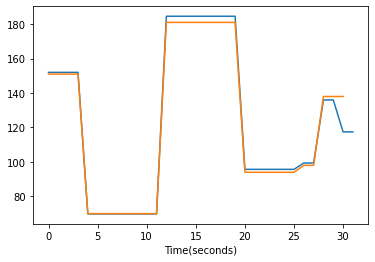

4.003290149973982


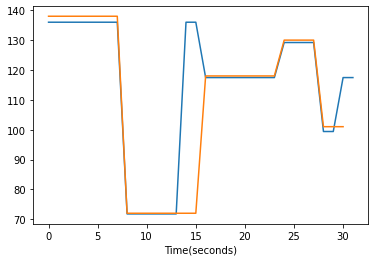

5442.196125459389


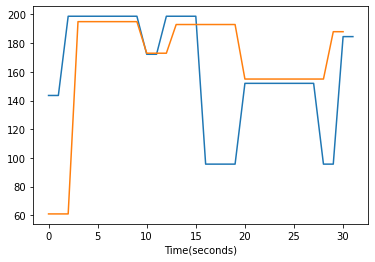

1619.278637247964


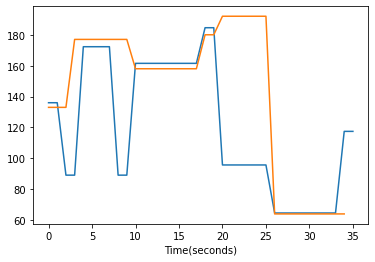

0.2490243911743164


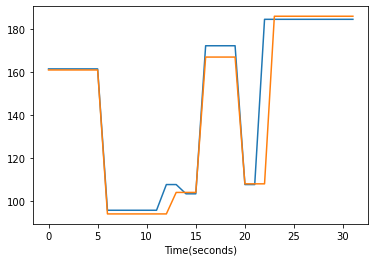

3.008056640625


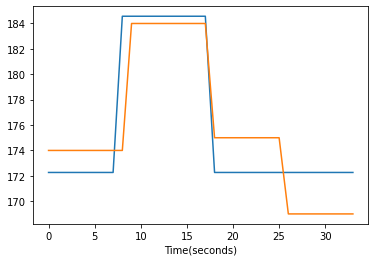

9.067626953125


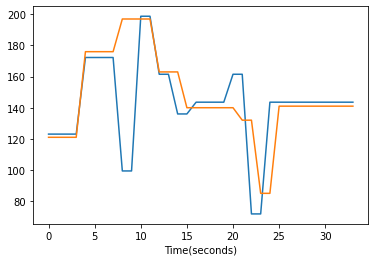

24.932519709570148


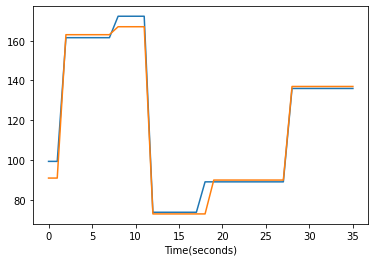

In [60]:

for error, signal, gt in windowed_errors:
    print(error)
    plt.plot(r_[0: len(signal)], signal)
    plt.plot(r_[0: len(gt)], gt)
    plt.xlabel("Time(seconds)")
    plt.show()

In [19]:
r_[0: len(signal)]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [20]:
def validation(data):
    window_lens = [1,2,3,4,5,6,7,8]
    best_win, smallest_error = None, 100000000
    
    for win in window_lens:
        avg_error = 0
        for pair in data:
            gt, tempos = pair[1], pair[0] 
            error, signal, gt_signal = evaluate(gt, tempos, win_len=win)
            avg_error += error
        avg_error = avg_error / len(data)
        if avg_error < smallest_error:
            smallest_error = avg_error
            best_win = win
        print(avg_error)
    return best_win

In [21]:
validation(data)

2960.3470146817313
1260.6209359532918
241.70506263758378
362.60197962045316
676.5070817185849
990.6941547573639
1013.9448871792389
1037.1956196011138


3

In [22]:
median_data = get_data(median_windowed_tempo)

In [23]:
validation(median_data)

2499.9986675924592
1585.5240090960624
1035.6253501728313
969.56512978012
1078.0992085933729
1235.0576213503873
1258.3083537722623
1281.5590861941373


4

In [24]:
median_errors = []
for pair in median_data:
    gt, tempos = pair[1], pair[0] 
    error, signal, gt_signal = evaluate(gt, tempos)
    median_errors.append((error, signal, gt_signal))

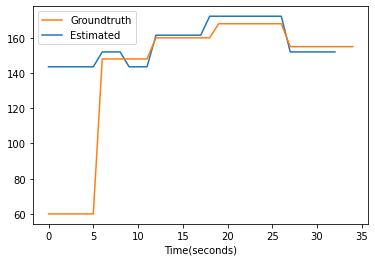

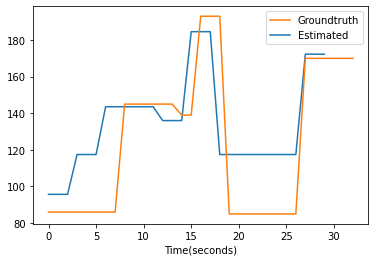

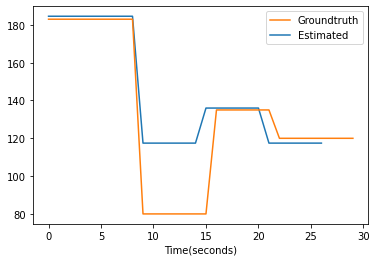

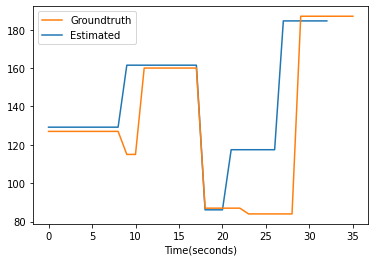

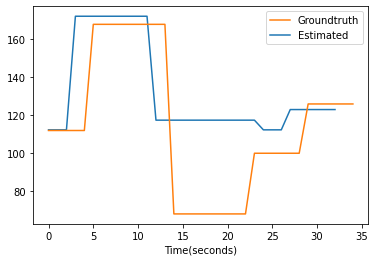

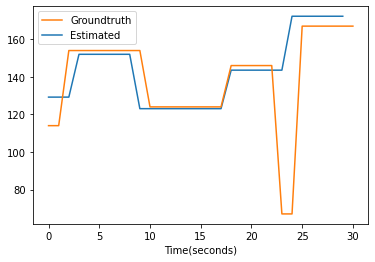

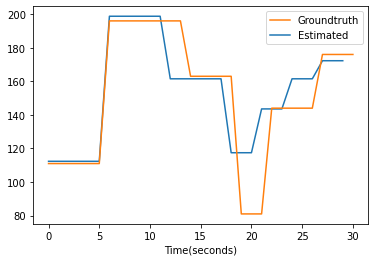

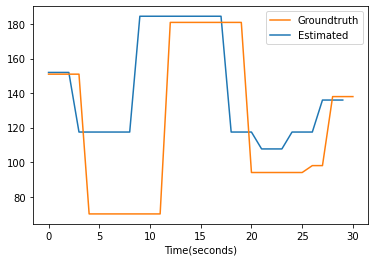

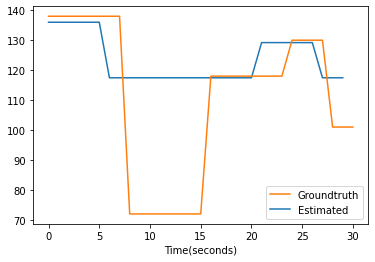

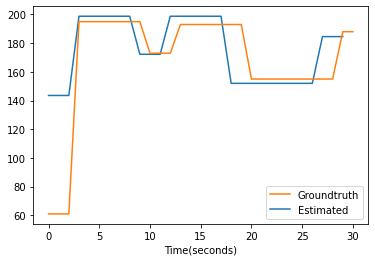

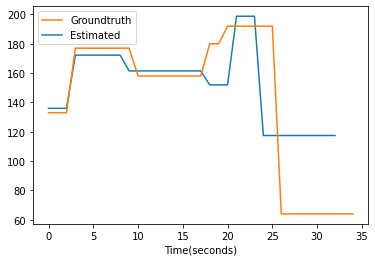

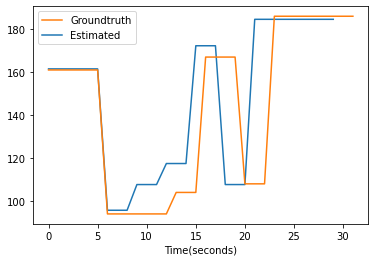

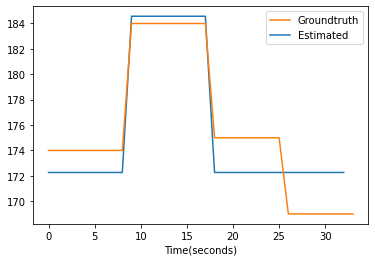

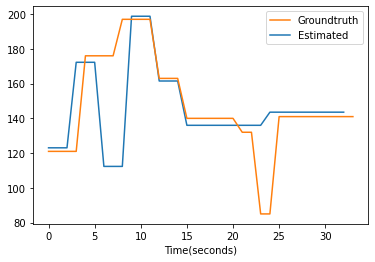

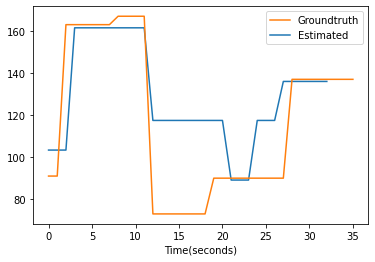

In [27]:
for error, signal, gt in median_errors:
    estimated, = plt.plot(r_[0: len(signal)], signal, label="Estimated")
    groundtruth, = plt.plot(r_[0: len(gt)], gt, label="Groundtruth")
    plt.legend(handles=[groundtruth, estimated])
    plt.xlabel("Time(seconds)")
    plt.show()

In [66]:
overlap_data = get_data(overlap_windowed_tempo, win_len=1)

In [67]:
overlap_errors = []
for pair in overlap_data:
    gt, tempos = pair[1], pair[0] 
    error, signal, gt_signal = evaluate2(gt, tempos, win_len=1)
    overlap_errors.append((error, signal, gt_signal))

6245.297279042646


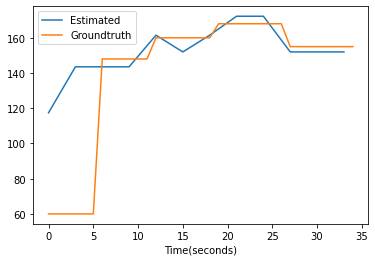

510.3695274332011


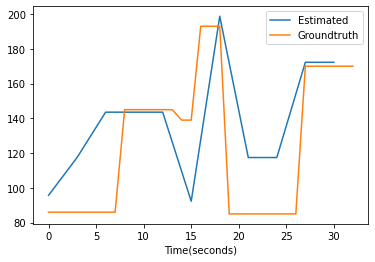

390.83258056640625


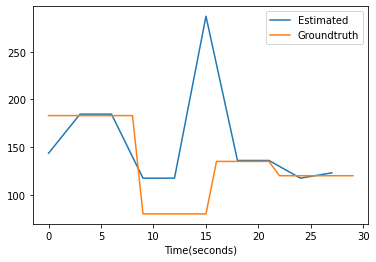

6.635002136230469


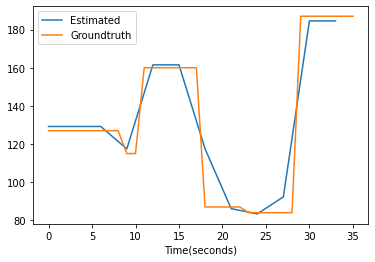

59.25903380886143


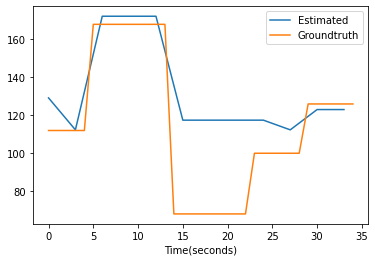

41.627147295630145


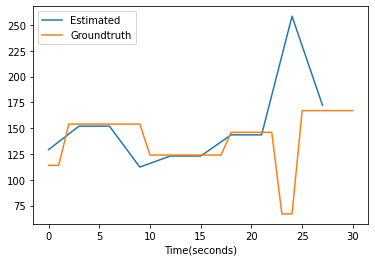

56.714264132350074


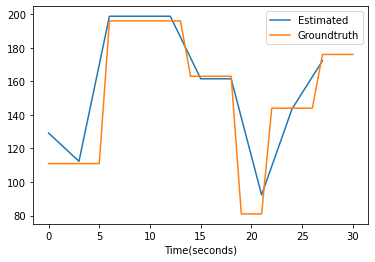

769.4928227539873


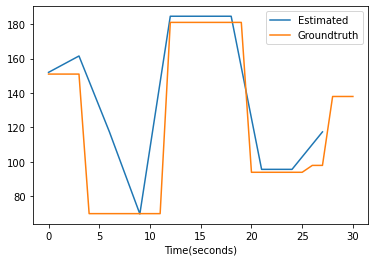

4.003290149973982


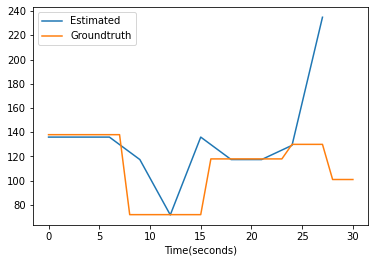

2287.0235373652963


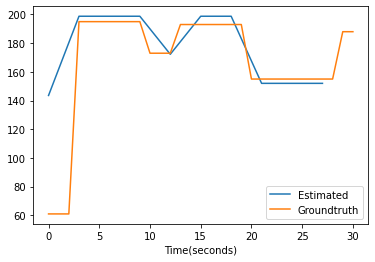

199.3089354242975


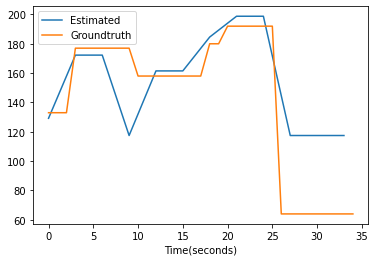

0.2490243911743164


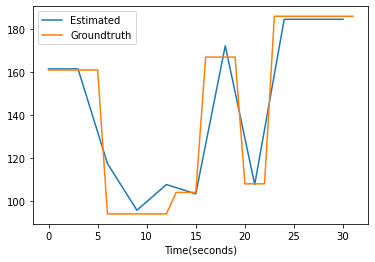

3.008056640625


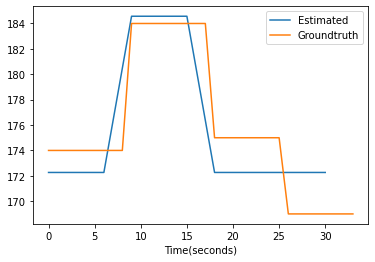

652.5571264988291


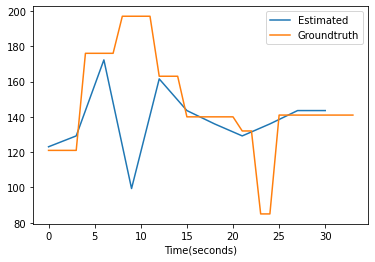

38.67626180028068


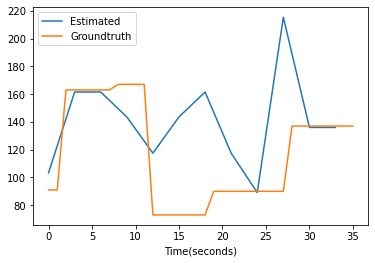

In [69]:
for error, signal, gt in overlap_errors:
    print(error)
    estimated, = plt.plot(r_[0: len(signal):3], signal[::3], label="Estimated")
    groundtruth, = plt.plot(r_[0: len(gt)], gt, label="Groundtruth")
    
    plt.legend(handles=[estimated, groundtruth])
    plt.xlabel("Time(seconds)")
    plt.show()

In [35]:
def average_error(errors):
    average = sum(e[0] for e in errors) // len(overlap_errors)
    return average

In [36]:
average_error(overlap_errors)

1852.0

In [62]:
def window_errors(windows, tempo_fn, evaluate_fn):
    windowed_errors = {}
    for win in windows:
        data = get_data(tempo_fn, win_len = win)
        errors = []
        for pair in data:
            gt, tempos = pair[1], pair[0] 
            error, signal, gt_signal = evaluate_fn(gt, tempos, win_len=win)
            errors.append((error, signal, gt_signal))
        average = average_error(errors)
        windowed_errors[win] = average
    return windowed_errors

In [70]:
window_errors([1,2,3,4,5], overlap_windowed_tempo, evaluate2)

{1: 9868.0, 2: 17541.0, 3: 22716.0, 4: 32188.0, 5: 34610.0}

In [71]:
window_errors([1,2,3,4,5], median_windowed_tempo, evaluate)

{1: 25940.0, 2: 30933.0, 3: 30965.0, 4: 28598.0, 5: 28891.0}

In [72]:
window_errors([1,2,3,4,5], windowed_tempo, evaluate)

{1: 9868.0, 2: 9312.0, 3: 14445.0, 4: 16285.0, 5: 17454.0}